# Trabalho 2

Curso de Data Science
Prof. MSc. Eng. Marcelo Bianchi

Trabalho 2 – Curso de Data Science
Integrantes do Grupo: 
- Carlos
- Israel
- Lenilson
- Nara


Dataset: Heart Failure Clinical Records
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Attribute Information:

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean) 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [4]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')

In [7]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [109]:
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [11]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [24]:
features = pd.DataFrame(data=data, columns=[column for column in data.columns if column != 'DEATH_EVENT' ])
target = pd.DataFrame(data=data, columns=['DEATH_EVENT'])


In [25]:
target.shape

(299, 1)

In [26]:
features.shape

(299, 12)

In [27]:
target.head()

DEATH_EVENT
0            1
1            1
2            1
3            1
4            1

In [28]:
features.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [29]:
features.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

<AxesSubplot:>

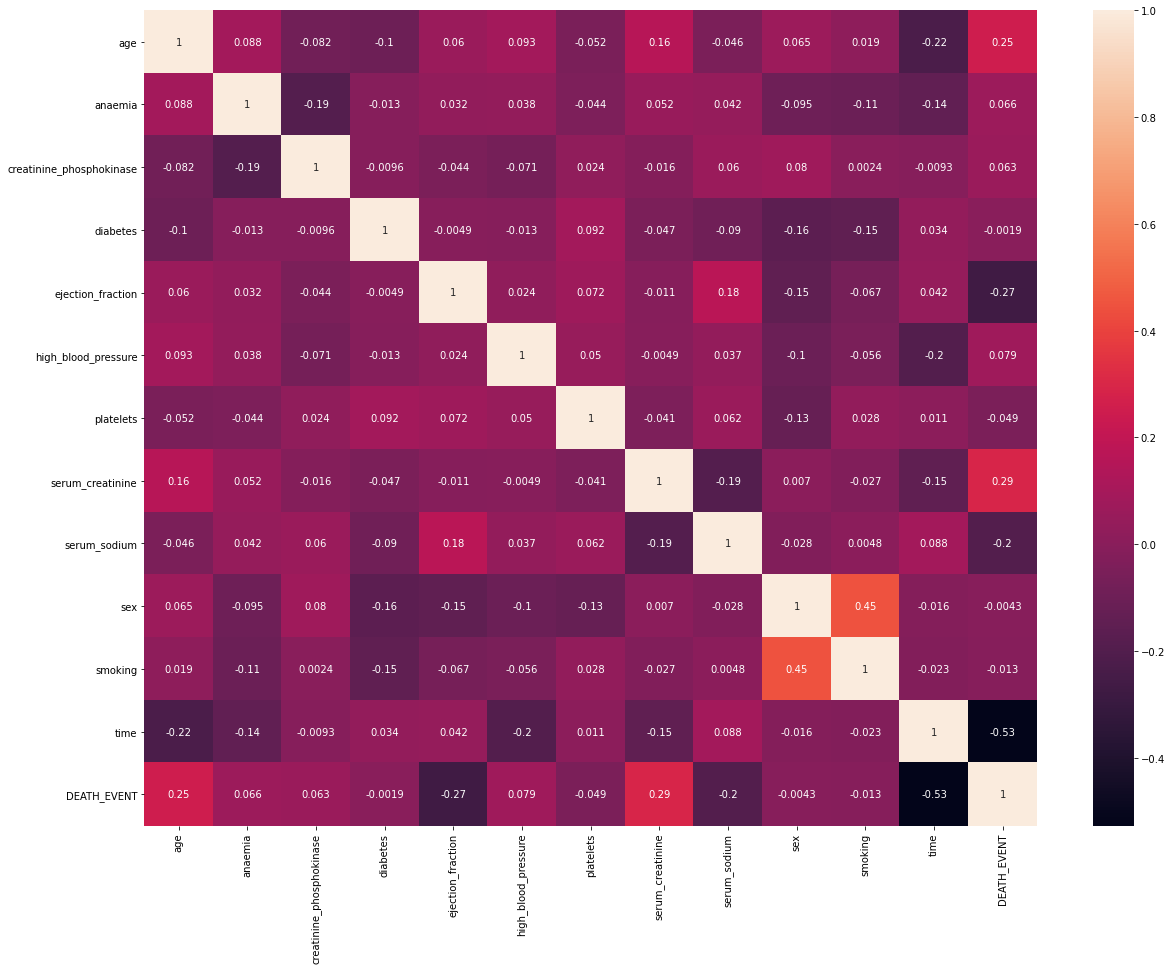

In [34]:
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)


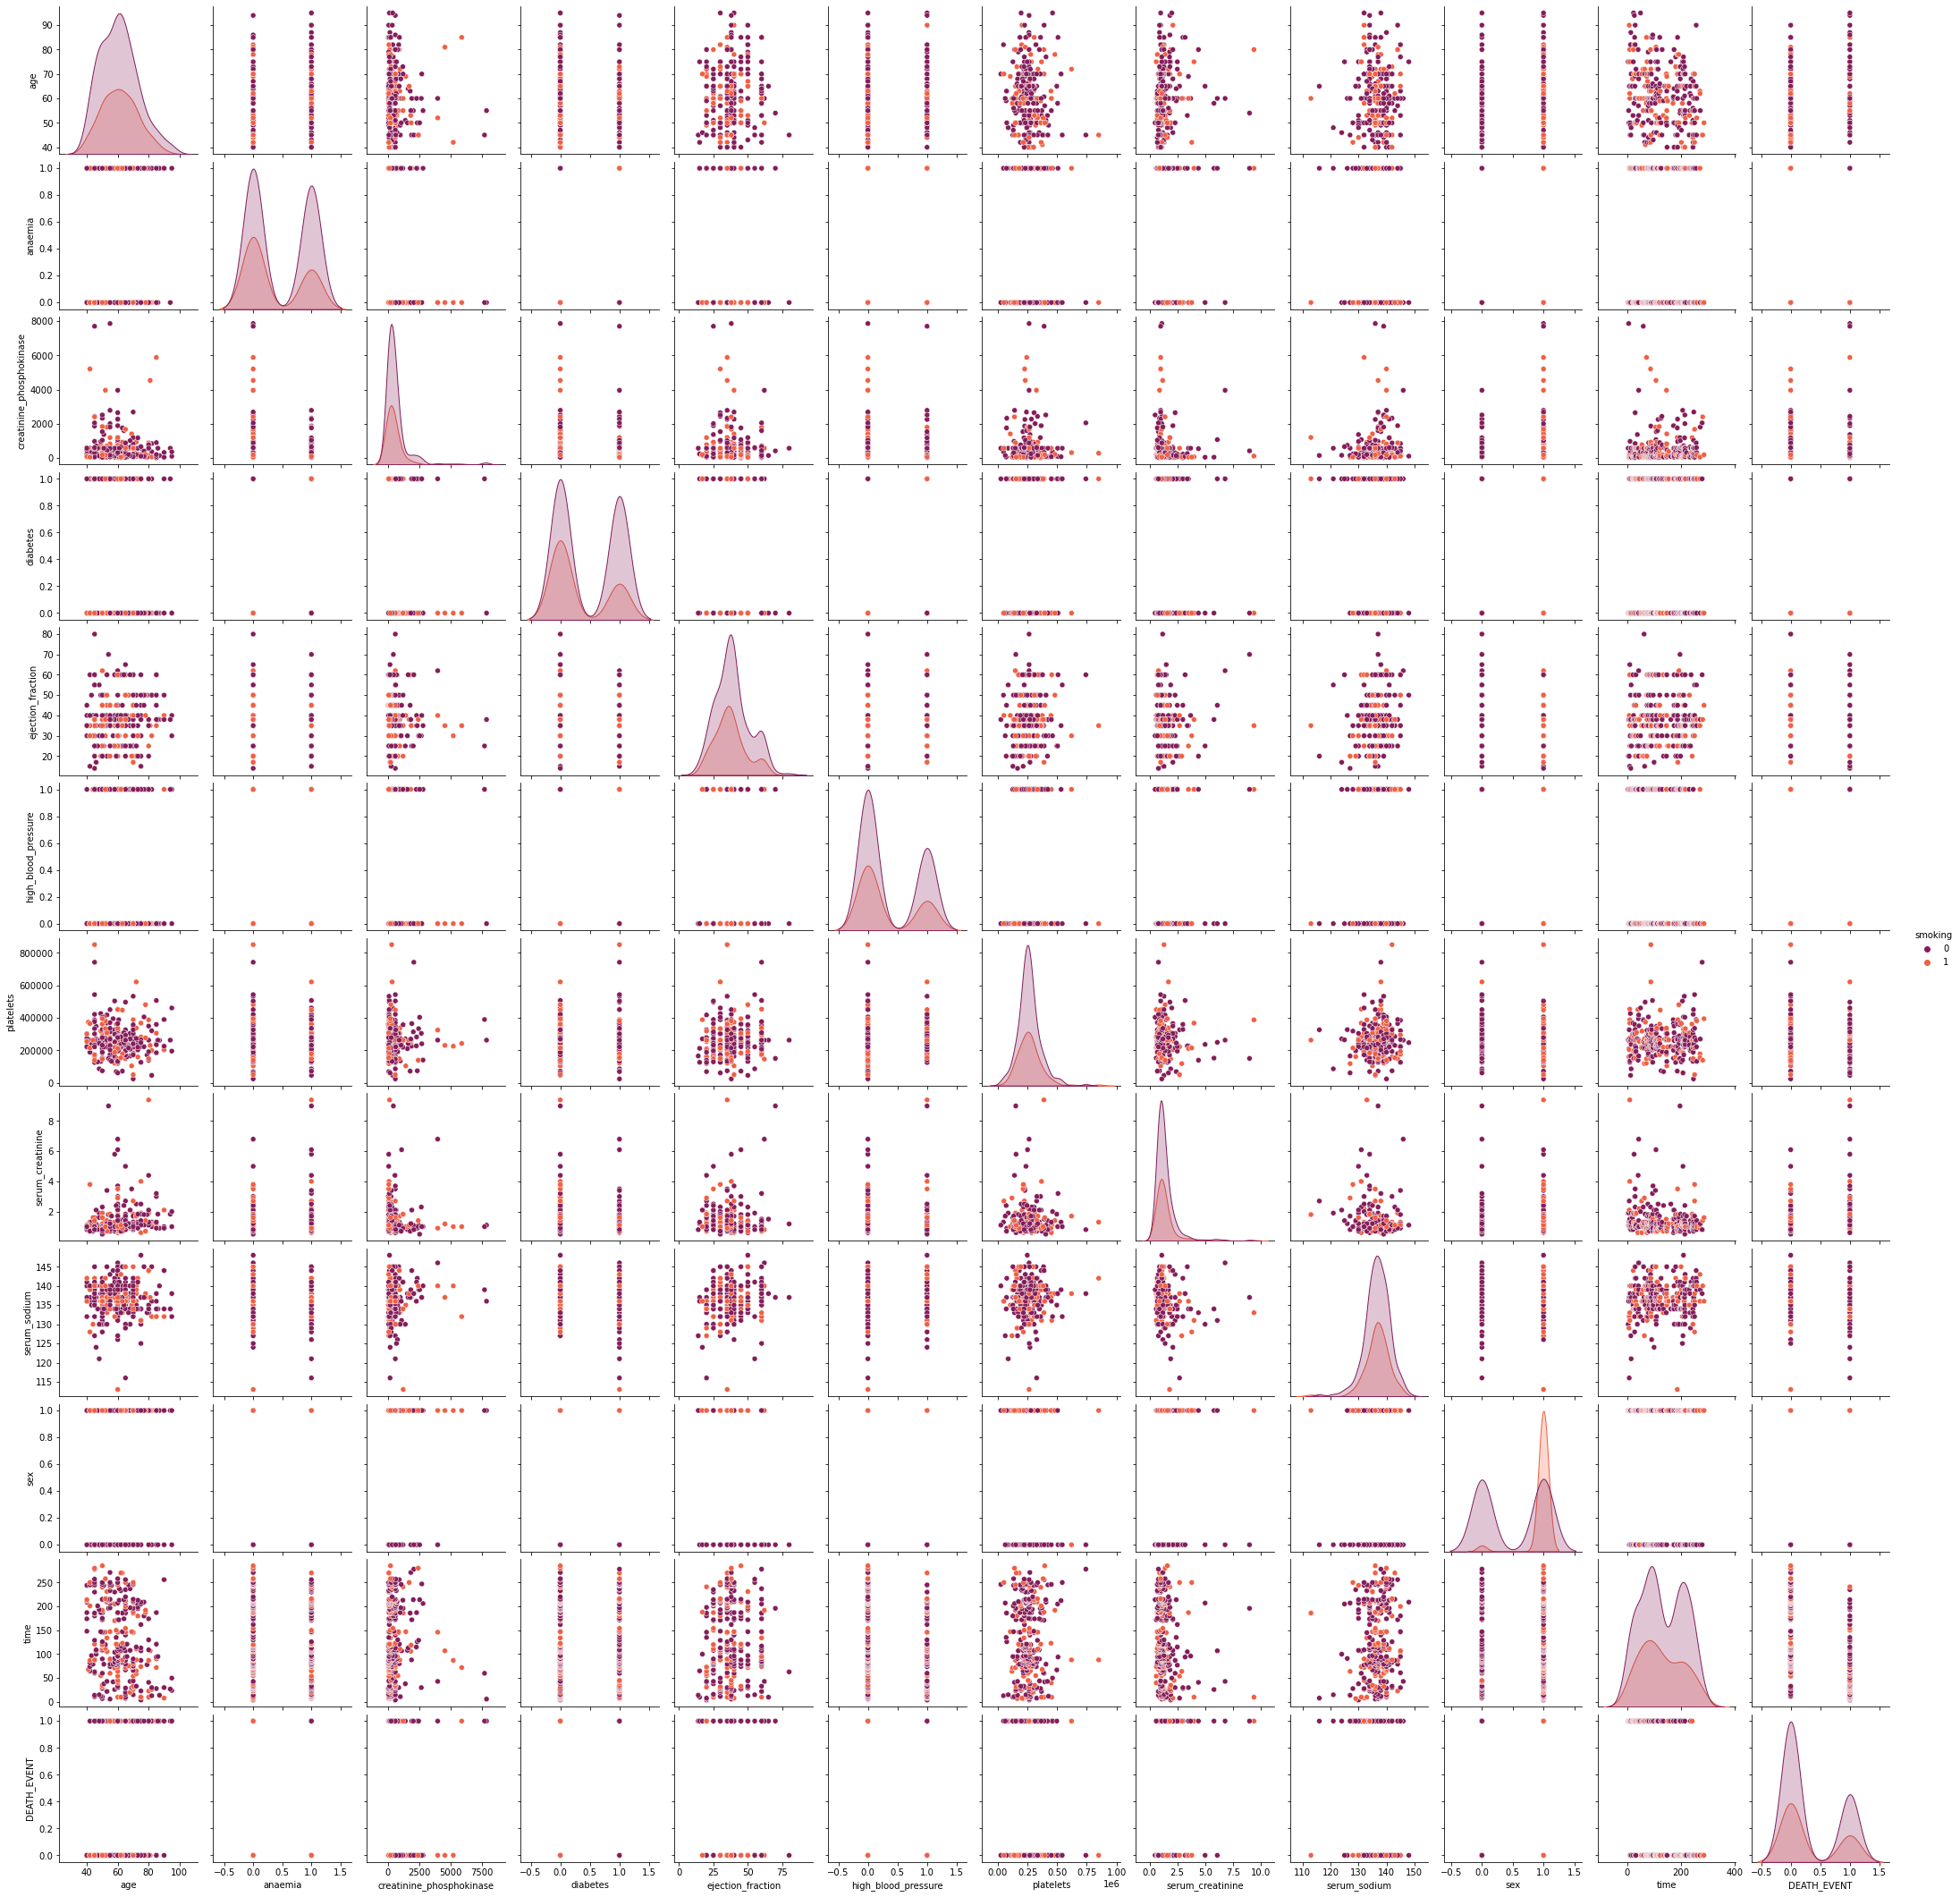

In [37]:
sns.pairplot(data=data,hue='smoking', palette='rocket')

## 2) Dividir o Dataset entre Training e Test sets

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, np.ravel(target), test_size=0.2, random_state=42)

## 3) Aplicar Feature Scaling (Se for aplicável, senão for então justificar)

In [39]:
# acho que não precisa

## 4) Aplicar Dummy Variable (Se for aplicável, senão for então  justificar) 

In [40]:
# Não precisa, pois os dados são numéricos ou binários:
features.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
dtype: object

## 5) Aplicar e Comparar os resultados dos algoritmos de Classificação 

### 5.1) Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

In [96]:
model_LR.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred_LR = model_LR.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

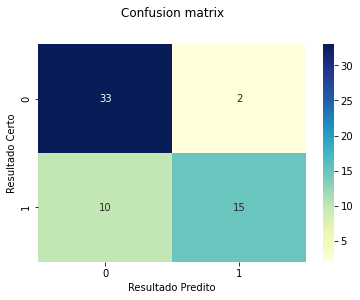

In [98]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [99]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [100]:
# Fazer gráficos

### 5.2) KNN - K Nearest Neighborhood

In [49]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [50]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [51]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 58.333333333333336 % and k = [14]


C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


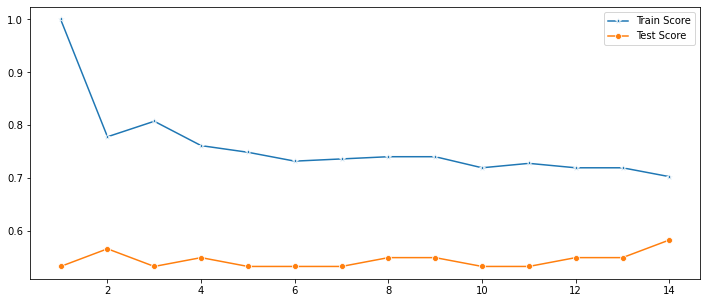

In [52]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [53]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5333333333333333

Text(0.5, 15.0, 'Resultado Predito')

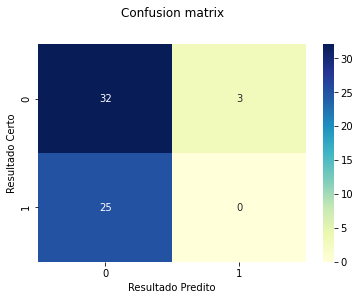

In [55]:
#Confusion Matrix

y_pred_knn = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [64]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.91      0.70        35
           1       0.00      0.00      0.00        25

    accuracy                           0.53        60
   macro avg       0.28      0.46      0.35        60
weighted avg       0.33      0.53      0.41        60



In [101]:
# Fazer gráficos

### 5.3) SVM - Support Vector Machines

In [41]:
from sklearn.svm import SVC

model_svc = SVC()

In [43]:
model_svc.fit(X_train, y_train)

SVC()

In [57]:
y_pred_svc = model_svc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

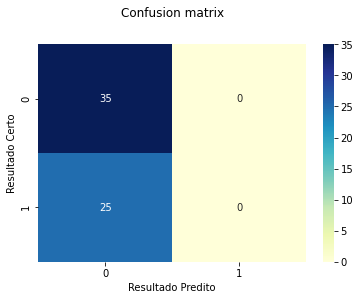

In [88]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [89]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60



In [ ]:
# Fazer gráficos

### 5.4) Kernel SVM

In [103]:
from sklearn.svm import SVC

# usando kernel polinomial
model_svc_kernel = SVC(kernel='poly', degree=8)

In [104]:
model_svc_kernel.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [105]:
y_pred_svc_kernel = model_svc_kernel.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

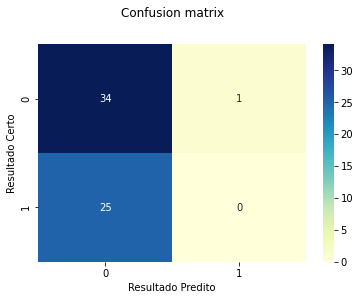

In [106]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc_kernel)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [107]:
print(classification_report(y_test, y_pred_svc_kernel))

              precision    recall  f1-score   support

           0       0.58      0.97      0.72        35
           1       0.00      0.00      0.00        25

    accuracy                           0.57        60
   macro avg       0.29      0.49      0.36        60
weighted avg       0.34      0.57      0.42        60



In [108]:
# Fazer gráficos

### 5.5) Naive Bays

In [79]:
from sklearn.naive_bayes import GaussianNB
model_naive_bays = GaussianNB()


In [80]:
model_naive_bays.fit(X_train, y_train)

GaussianNB()

In [82]:
model_naive_bays.fit(X_train, y_train)

GaussianNB()

In [83]:
y_pred_naive_bays = model_svc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

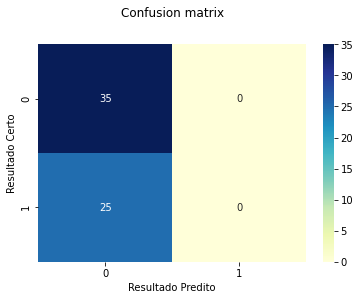

In [84]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_naive_bays)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [85]:
print(classification_report(y_test, y_pred_naive_bays))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60



C:\Users\junio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# Fazer gráficos

### 5.6) Decision Tree (Classification)

In [59]:
from sklearn import tree
model_dtc = tree.DecisionTreeClassifier()

In [60]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
y_pred_dtc = model_dtc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

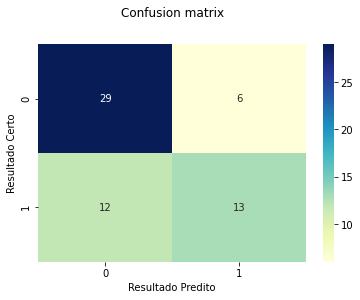

In [63]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [86]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        35
           1       0.68      0.52      0.59        25

    accuracy                           0.70        60
   macro avg       0.70      0.67      0.68        60
weighted avg       0.70      0.70      0.69        60



In [ ]:
# Fazer gráficos

### 5.7) Random Forest (Classification)

In [70]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

In [75]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_pred_rfc = model_rfc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

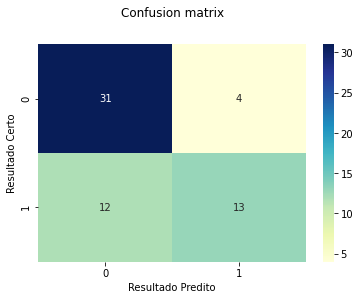

In [78]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [87]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60



In [ ]:
# Fazer gráficos

## Conclusão: o melhor modelo